# Imports

In [1]:
import pandas as pd
# from tqdm import tqdm_notebook as tqdm
# from shapely.geometry import Polygon
# import pickle
import matplotlib.pyplot as plt
from pymove import MoveDataFrame

# Load data

In [2]:
df = pd.read_csv('examples/geolife_sample.csv', parse_dates=['datetime'])
data = MoveDataFrame(df, latitude="lat", longitude="lon", datetime="datetime")
data = MoveDataFrame(data[:100])
data

,lat,lon,datetime,id
0,39.984094,116.319236,2008-10-23 05:53:05,1
1,39.984198,116.319322,2008-10-23 05:53:06,1
2,39.984224,116.319402,2008-10-23 05:53:11,1
3,39.984211,116.319389,2008-10-23 05:53:16,1
4,39.984217,116.319422,2008-10-23 05:53:21,1
...,...,...,...,...
95,39.979622,116.322669,2008-10-23 05:59:05,1
96,39.979570,116.322801,2008-10-23 05:59:08,1
97,39.979546,116.322926,2008-10-23 05:59:11,1
98,39.979550,116.323046,2008-10-23 05:59:14,1


# Create virtual Grid

In [3]:
from pymove.core.grid import Grid

In [4]:
grid = Grid(data, 15)


Creating a virtual grid without polygons
...cell size by degree: 0.0001353464801860623
...grid_size_lat_y:41
grid_size_lon_x:30

..A virtual grid was created


In [5]:
grid.get_grid()

{'lon_min_x': 116.319236,
 'lat_min_y': 39.979546,
 'grid_size_lat_y': 41,
 'grid_size_lon_x': 30,
 'cell_size_by_degree': 0.0001353464801860623}

# Create one polygon to point on grid

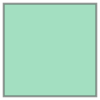

In [6]:
grid.create_one_polygon_to_point_on_grid(2, 1)

# Create or update index grid feature

In [7]:
grid.create_update_index_grid_feature(data)


Creating or updating index of the grid feature..

...[100,100] indexes were created to lat and lon


# Create all polygons to all point on grid

In [8]:
data = grid.create_all_polygons_to_all_point_on_grid(data)


Creating or updating index of the grid feature..

...[100,100] indexes were created to lat and lon



...polygons were created


In [9]:
data

,id,index_grid_lat,index_grid_lon,polygon
0,1,33,0,"POLYGON ((39.98401243384614 116.319236, 39.984..."
1,1,34,0,"POLYGON ((39.98414778032632 116.319236, 39.984..."
2,1,34,1,"POLYGON ((39.98414778032632 116.3193713464802,..."
5,1,38,4,"POLYGON ((39.98414778032632 116.3193713464802,..."
6,1,37,4,"POLYGON ((39.98414778032632 116.3193713464802,..."
...,...,...,...,...
95,1,0,25,"POLYGON ((39.98144085072261 116.3212661972028,..."
96,1,0,26,"POLYGON ((39.98130550424242 116.3212661972028,..."
97,1,0,27,"POLYGON ((39.98117015776223 116.3212661972028,..."
98,1,0,28,"POLYGON ((39.98103481128204 116.3212661972028,..."


# Create all polygons on grid

In [10]:
grid.create_all_polygons_on_grid()


Creating all polygons on virtual grid



...geometry was created in a object Grid


In [11]:
data

,id,index_grid_lat,index_grid_lon,polygon
0,1,33,0,"POLYGON ((39.98401243384614 116.319236, 39.984..."
1,1,34,0,"POLYGON ((39.98414778032632 116.319236, 39.984..."
2,1,34,1,"POLYGON ((39.98414778032632 116.3193713464802,..."
5,1,38,4,"POLYGON ((39.98414778032632 116.3193713464802,..."
6,1,37,4,"POLYGON ((39.98414778032632 116.3193713464802,..."
...,...,...,...,...
95,1,0,25,"POLYGON ((39.98144085072261 116.3212661972028,..."
96,1,0,26,"POLYGON ((39.98130550424242 116.3212661972028,..."
97,1,0,27,"POLYGON ((39.98117015776223 116.3212661972028,..."
98,1,0,28,"POLYGON ((39.98103481128204 116.3212661972028,..."


# Get point to index grid 

In [12]:
grid.point_to_index_grid(39.984094, 116.319236)

...[1,1] indexes were created to lat and lon


(33.0, 0.0)

# Save grid to .pkl

In [13]:
grid.save_grid_pkl('teste.pkl')


A file was saved


# Read .pkl to grid

In [14]:
grid.read_grid_pkl('teste.pkl')

{'lon_min_x': 116.319236,
 'lat_min_y': 39.979546,
 'grid_size_lat_y': 41,
 'grid_size_lon_x': 30,
 'cell_size_by_degree': 0.0001353464801860623}

# Show a grid polygons

In [15]:
data = data[data['id'] == 1]
data

,id,index_grid_lat,index_grid_lon,polygon
0,1,33,0,"POLYGON ((39.98401243384614 116.319236, 39.984..."
1,1,34,0,"POLYGON ((39.98414778032632 116.319236, 39.984..."
2,1,34,1,"POLYGON ((39.98414778032632 116.3193713464802,..."
5,1,38,4,"POLYGON ((39.98414778032632 116.3193713464802,..."
6,1,37,4,"POLYGON ((39.98414778032632 116.3193713464802,..."
...,...,...,...,...
95,1,0,25,"POLYGON ((39.98144085072261 116.3212661972028,..."
96,1,0,26,"POLYGON ((39.98130550424242 116.3212661972028,..."
97,1,0,27,"POLYGON ((39.98117015776223 116.3212661972028,..."
98,1,0,28,"POLYGON ((39.98103481128204 116.3212661972028,..."


id                                                                1
index_grid_lat                                                   33
index_grid_lon                                                    0
polygon           POLYGON ((39.98401243384614 116.319236, 39.984...
Name: 0, dtype: object
POLYGON ((39.98401243384614 116.319236, 39.98414778032632 116.319236, 39.98414778032632 116.3193713464802, 39.98401243384614 116.3193713464802, 39.98401243384614 116.319236))
LINEARRING (39.98401243384614 116.319236, 39.98414778032632 116.319236, 39.98414778032632 116.3193713464802, 39.98401243384614 116.3193713464802, 39.98401243384614 116.319236)


(    id  index_grid_lat  index_grid_lon  \
 0    1              33               0   
 1    1              34               0   
 2    1              34               1   
 5    1              38               4   
 6    1              37               4   
 ..  ..             ...             ...   
 95   1               0              25   
 96   1               0              26   
 97   1               0              27   
 98   1               0              28   
 99   1               0              29   
 
                                               polygon  
 0   POLYGON ((39.98401243384614 116.319236, 39.984...  
 1   POLYGON ((39.98414778032632 116.319236, 39.984...  
 2   POLYGON ((39.98414778032632 116.3193713464802,...  
 5   POLYGON ((39.98414778032632 116.3193713464802,...  
 6   POLYGON ((39.98414778032632 116.3193713464802,...  
 ..                                                ...  
 95  POLYGON ((39.98144085072261 116.3212661972028,...  
 96  POLYGON ((39.98130550

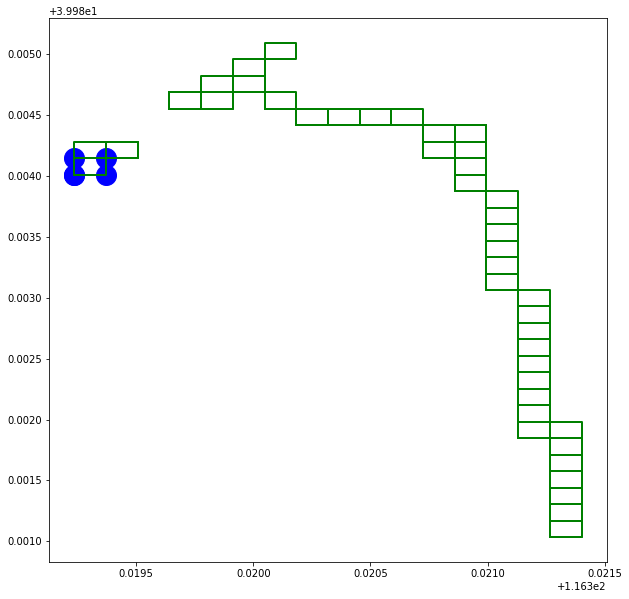

In [16]:
grid.show_grid_polygons(data, 1)